# Regresión Lineal
Este notebook es de práctica para Regresión Lineal

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [4]:
# Cargamos un Dataset de ejemplo de SciKitLearn
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
# Es un diccionario con varios elementos, vamos a conocer sus claves
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [8]:
#Forma de los datos
print(boston.data.shape)

(506, 13)


In [9]:
#Nombres de las características
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
# Descripción del Dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [16]:
# Convertir en DataFrame
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
# La variable objetivo se encuentra en otro elemento del diccionario
print("Variable Objetivo: ", boston.target)

Variable Objetivo:  [ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.  

In [18]:
# Agregar variable objetivo al DataFrame
df_boston["PRICE"] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Ejercicio
Realizar Análisis inicial y estadística descriptiva,
* Verificar si hay datos faltantes
* Qué tipo de variables estadísticas son cada una de las características
* Use la funcion df_boston.describe() para analizar los principales datos de estadística descriptiva del DataSet
* Cree gráficos de histogramas
* Cree un gráfico de la matriz de correlación del DataFrame
    * ¿Cuáles de las características tienen alta correlación entre ellas?
    * ¿Cuáles de las caractarísticas tienen más relación con la variable objetivo?
* Cree un grafico de dispersión del DataFrame y verifique si se ven grupos

In [23]:
df_boston["PRICE"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

## Separar Sets de Entrenamiento y de Test
Para realizar un entrenamiento de un modelo en aprendizaje de máquina se debe considerar una parte del Dataset para entrenamiento y otro para Test, para poder validar el comportamiento del modelo en Datos que no ha visto en el entrenamiento

In [24]:
# Set de Características
X = df_boston.drop("PRICE", axis =1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# Set de Variable Objetivo
Y = df_boston["PRICE"]
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

# Separar Set para Entrenamiento y para Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35)

In [28]:
print("Tamaños de set de entrenamiento:", X_train.shape, Y_train.shape)

Tamaños de set de entrenamiento: (328, 13) (328,)


In [30]:
print("Tamaño de set de test", X_test.shape, Y_test.shape)

Tamaño de set de test (178, 13) (178,)


In [31]:
# Regresión Lineal

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)  # Entrenamiento de regresión Lineal


/Users/javiercocu/py3env/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lm.coef_  # Coeficientes para cada uno de las características

array([ -5.43412178e-02,   4.44194693e-02,   3.00971346e-02,
         4.27655988e+00,  -1.46897627e+01,   4.45758622e+00,
        -3.94547710e-03,  -1.30900118e+00,   2.62348371e-01,
        -1.31911153e-02,  -9.50683586e-01,   1.14004213e-02,
        -4.98158116e-01])

In [35]:
lm.intercept_

29.661808851329798

In [36]:
# Usar el modelo para predecir los valores de Y del set de Test
Y_pred = lm.predict(X_test)

Text(0.5,1,'Precios vs Precios Predecidos: $Y_i$ vs $\\hat{Y}_i$')

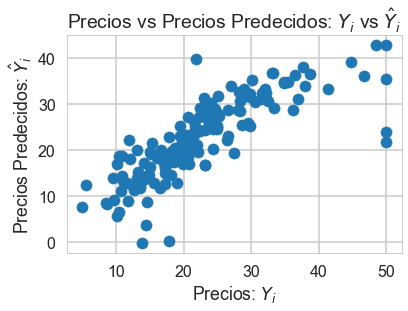

In [37]:
# Gráfica de Precios predecidos contra Precios reales

plt.scatter(Y_test, Y_pred)
plt.xlabel("Precios: $Y_i$")
plt.ylabel("Precios Predecidos: $\hat{Y}_i$")
plt.title("Precios vs Precios Predecidos: $Y_i$ vs $\hat{Y}_i$")

## Error cuadrático medio
El Error cuadrático medio mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.

In [38]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

27.6949642105
